<a href="https://colab.research.google.com/github/ali-ahmadi79/MachineLearning/blob/main/CustomerClusteringUsingWebForm_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


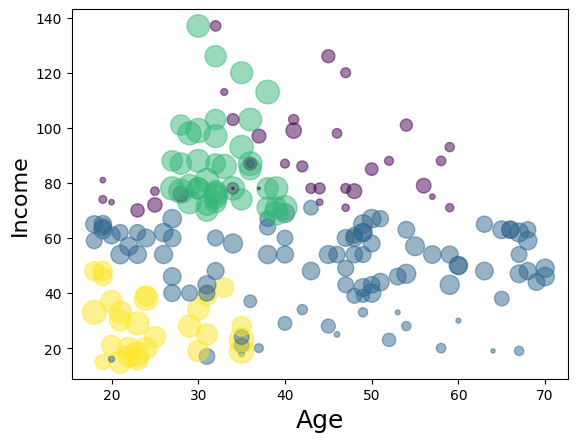

In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import streamlit as st

## Selection for ML algorithms:

def doRunML(MLAlgorithm, ScatterAlphaValue = 0.5, ClusterNo = 4, AgglomarativeLinkage = 'complete', blobSize = 2) -> None:

    dfCluster = pd.read_csv("ClusteringQuiz.csv", sep=",")
    print(dfCluster.head())
    st.header('Customer clustering ')
    # st.dataframe(dfCluster)

    dfCluster['Gender'] = [0 if i=="Female" else 1 for i in dfCluster['Gender']]
    dfCluster = dfCluster.drop(['CustomerID'], axis=1 )

    def CustomerSegment(labels):
        dfCluster['CustomerSeg'] = labels
        st.subheader('Customer Segmentation:')
        st.write(dfCluster.groupby('CustomerSeg').mean())

    def doShowScatterChart(X, blbSize, xlblFontSize=18, ylblFontSize=16, scatterAlpha = ScatterAlphaValue):
        area = np.pi * (X[:, 3]) * blbSize
        plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(float), alpha=scatterAlpha)
        plt.xlabel('Age', fontsize=xlblFontSize)
        plt.ylabel('Income', fontsize=ylblFontSize)
        st.pyplot(plt)

    dfSelectedCols = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

    if MLAlgorithm == 'K-Means':

        # K-Means Algorithm

        from sklearn.cluster import KMeans
        from sklearn.preprocessing import StandardScaler
        X = dfCluster[dfSelectedCols]
        X = np.nan_to_num(X)

        Clust_dataset = StandardScaler().fit_transform(X)
        clusternNum = ClusterNo # Get from slider
        k_means = KMeans(init='k-means++', n_clusters=clusternNum, n_init=12)
        k_means.fit(X)
        labels = k_means.labels_

        CustomerSegment(labels)
        doShowScatterChart(X, blobSize)


    elif MLAlgorithm == 'Hierarchial':

        # Hierarchial Algorithm
        from sklearn.preprocessing import MinMaxScaler
        featureset = dfCluster[dfSelectedCols]
        X = featureset.values
        min_max_scalar = MinMaxScaler()
        feature_mix = min_max_scalar.fit_transform(X)

        from sklearn.metrics.pairwise import euclidean_distances
        dist_matrix = euclidean_distances(feature_mix, feature_mix)

        # Agglomarative Technique
        from sklearn.cluster import AgglomerativeClustering
        agglom = AgglomerativeClustering(n_clusters=ClusterNo, linkage=AgglomarativeLinkage)
        agglom.fit(dist_matrix)
        labels = agglom.labels_

        CustomerSegment(labels)
        doShowScatterChart(X, blobSize)


    elif MLAlgorithm == 'DBSCAN':

        # DBSCAN Algorithm
        from sklearn.metrics.pairwise import euclidean_distances
        from sklearn.cluster import DBSCAN
        from sklearn.preprocessing import MinMaxScaler

        featureset = dfCluster[dfSelectedCols]
        X = featureset.values
        min_max_scaler = MinMaxScaler()
        feature_mtx = min_max_scaler.fit_transform(X)

        # DBSCAN clustering
        dbscan = DBSCAN(eps=0.3, min_samples=5)  # You may need to adjust the eps and min_samples
        dbscan.fit(feature_mtx)
        labels = dbscan.labels_

        CustomerSegment(labels)
        doShowScatterChart(X, blobSize)


if 'selectbox_visible_ml' not in st.session_state:
    st.session_state.selectbox_visible_ml = False

def toggle_visibility_ml() -> None:
    if st.session_state.ml_algorithm == 'Hierarchial':
        st.session_state.selectbox_visible_ml = True
    else:
        st.session_state.selectbox_visible_ml = False

MLAlgorithm = st.selectbox('ML Algorithm:', ('K-Means', 'Hierarchial', 'DBSCAN'), key='ml_algorithm', on_change=toggle_visibility_ml)

# Sidebar sliders
ScatterAlphaValue = st.sidebar.slider('Scatter Alpha value:', 0.1, 1.0, 0.5)
ClusterNo = st.sidebar.slider('Cluster numbers:', 1, 20, 4)
BlobSize = st.sidebar.slider('Blob size ratio:', 1, 5, 1)

# Conditional rendering of the Agglomarative linkage selectbox
if st.session_state.selectbox_visible_ml:
    AgglomarativeLinkage = st.selectbox('Agglomarative linkage (Hierarchical clustering):', ('complete', 'average', 'ward'))
else:
    AgglomarativeLinkage = 'complete'

doRunML(MLAlgorithm, ScatterAlphaValue, ClusterNo, AgglomarativeLinkage, BlobSize)